import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image
import plotly
import plotly.graph_objs as go

In [63]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## Loading Raw Data

In [64]:
def rename_cols_and_save(xls_name):
    df = pd.read_excel("../../data/{0}.xls".format(xls_name), index_col=None, header=None)
    if xls_name == 'hprice1':
        names_dict = {0:'price', 
                     1:'assess', 
                     2:'bdrms',
                     3:'lotsize', 
                     4:'sqrft', 
                     5:'colonial',
                     6:'lprice', 
                     7:'lassess', 
                     8:'llotsize',
                     9:'lsqrft', 
                    }
    elif xls_name == 'saving':
         names_dict = {0:'sav', 
                     1:'inc', 
                     2:'size',
                     3:'edu', 
                     4:'age', 
                     5:'black',
                     6:'cons', 
                      }
    elif xls_name == '401k':    
        names_dict = {0:'prate', 
                     1:'mrate', 
                     2:'totpart',
                     3:'totelg', 
                     4:'age', 
                     5:'totemp',
                     6:'sole', 
                     7:'ltotemp', 
                      }
        
    elif xls_name == '401ksubs': 
        
         
             
        names_dict = {0:'e401k', 
                     1:'inc', 
                     2:'marr',
                     3:'male', 
                     4:'age', 
                     5:'fsize',
                     6:'nettfa', 
                     7:'p401k',
                     8:'pira',
                     9:'incsq', 
                     10:'agesq',
                      }
        
        
    df.rename(columns = names_dict, inplace = True)
    df.to_csv("../../data/{0}.csv".format(xls_name), index=False)
    
    #print data dictionary after file is loaded
    f = open('../../data/{0}.des'.format(xls_name), 'r')
    file_contents = f.read()
    print(file_contents)
    
    
    
    return df


In [65]:
df = rename_cols_and_save(xls_name='401ksubs')



401KSUBS.DES

e401k     inc       marr      male      age       fsize     nettfa    p401k    
pira      incsq     agesq     

  Obs:     9275

 1. e401k                        =1 if eligble for 401(k)
 2. inc                          annual income, $1000s
 3. marr                         =1 if married
 4. male                         =1 if male respondent
 5. age                          age^2
 6. fsize                        family size
 7. nettfa                       net total fin. assets, $1000
 8. p401k                        =1 if participate in 401(k)
 9. pira                         =1 if have IRA
10. incsq                        inc^2
11. agesq                        age^2



In [66]:
class EDA(object):
    
    def __init__(self, df, y):
        self.df = df
        self.y_string = y
        self.y = df[y]
        return None
    
    
    def inspect(self):
        inspect = {}
        inspect['head'] = self.df.head()
        inspect['describe'] = self.df.describe().T
        inspect['dtypes'] = self.df.dtypes
        return inspect
        
        return inspect 
    
    def _dist_plot(self, df, var):
        plt.figure()
        sns_plot = sns.distplot(df[var], color='b').get_figure()
        sns_plot.savefig("dist_plot_{0}.png".format(var))
        return sns_plot
    
    
    def variation(self):
        numerical = self.df.select_dtypes(include=np.number)
        for col in numerical.columns: 
            self._dist_plot(df=numerical, var=col)   
        return None
    
    
    def _scatter_matrix(self):
        numerical = self.df.select_dtypes(include=np.number)
        plt.figure()
        sns_plot = sns.pairplot(numerical)
        sns_plot.savefig("scatter_matrix_plot.png".format())
        return None
    
    def _box_plot(self, var_x):
        plt.figure()
        sns_plot = sns.boxplot(x=var_x, y=self.y, data=self.df).get_figure()
        sns_plot.savefig("box_plot_{0}_{1}.png".format(var_x, self.y_string))
        return None
    
    def _scatter_plot(self, var_x):
        sns_plot = sns.lmplot(x=var_x, y=self.y_string, data=self.df)
        sns_plot.savefig("correlation_{0}_{1}.png".format(var_x, self.y_string))
        return None
    
    def covariation(self):
        self._scatter_matrix()
        
        categorical = self.df.select_dtypes(include=['bool', 'category']) 
        for col in categorical.columns:
            self._box_plot(var_x = col)
         
        numerical = self.df.select_dtypes(include=np.number)
        for col in numerical.columns:
            self._scatter_plot(var_x=col)
        return None
    
    def run(self):
        self.variation()
        self.covariation()
        return None
    
    pass

In [67]:
my_eda = EDA(df, y='nettfa')

In [77]:
my_eda.inspect()['head']

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,False,13.170,False,False,40,1,4.575,False,True,173.4489,1600
1,True,61.230,False,True,35,1,154.000,True,False,3749.1130,1225
2,False,12.858,True,False,44,2,0.000,False,False,165.3282,1936
3,False,98.880,True,True,44,2,21.800,False,False,9777.2540,1936
4,False,22.614,False,False,53,1,18.450,False,False,511.3930,2809


In [75]:
my_eda.inspect()['describe']

,count,mean,std,min,25%,50%,75%,max
inc,9275.0,39.254641,24.090002,10.0080,21.6600,33.288,50.1600,199.041
age,9275.0,41.080216,10.299517,25.0000,33.0000,40.000,48.0000,64.000
fsize,9275.0,2.885067,1.525835,1.0000,2.0000,3.000,4.0000,13.000
nettfa,9275.0,19.071675,63.963838,-502.3020,-0.5000,2.000,18.4495,1536.798
incsq,9275.0,2121.192483,3001.469424,100.1601,469.1556,1108.091,2516.0255,39617.320
agesq,9275.0,1793.652722,895.648841,625.0000,1089.0000,1600.000,2304.0000,4096.000


## Cleaning Dataset

In [69]:
def to_bool(df, list_of_vars):
    for var in list_of_vars:
        df[var] = df[var].astype('bool')
    return df

In [70]:
bool_vars = ['e401k', 'marr', 'male', 'p401k', 'pira']

In [71]:
df_clean = to_bool(df=df, list_of_vars=bool_vars)

In [72]:
df_clean.dtypes

e401k        bool
inc       float64
marr         bool
male         bool
age         int64
fsize       int64
nettfa    float64
p401k        bool
pira         bool
incsq     float64
agesq       int64
dtype: object

In [73]:
my_eda_clean = EDA(df, y='nettfa')

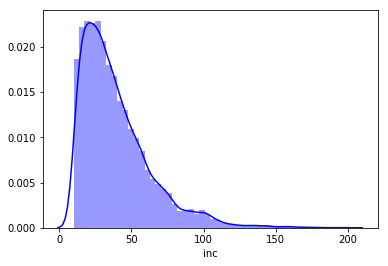

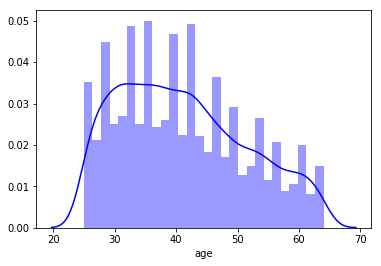

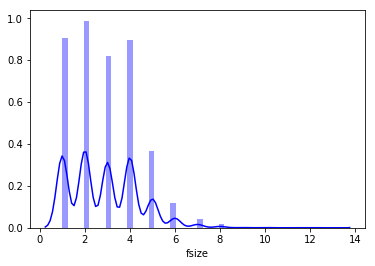

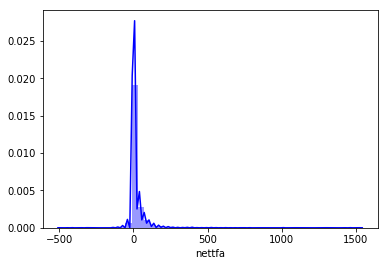

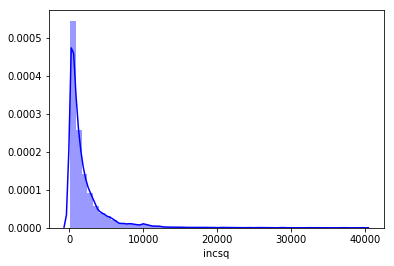

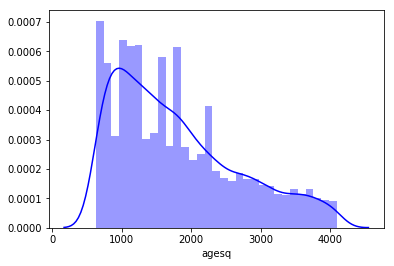

<Figure size 432x288 with 0 Axes>

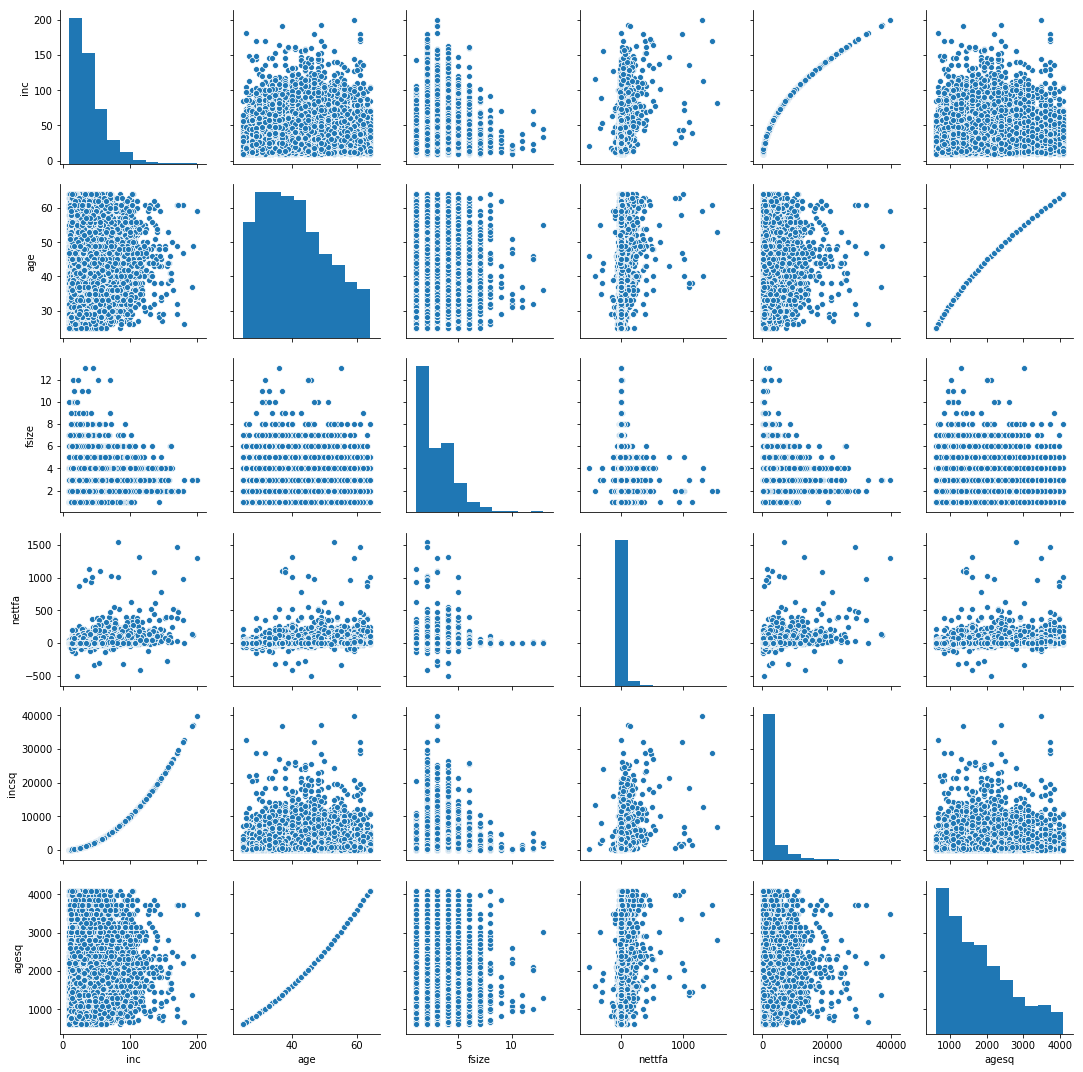

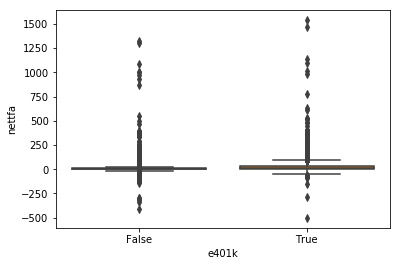

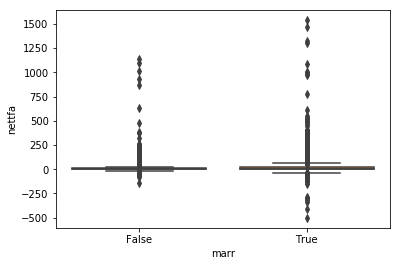

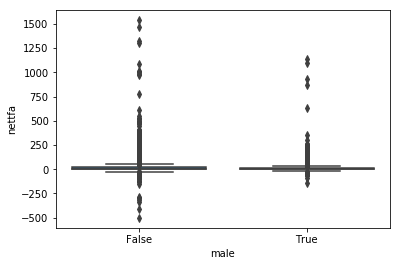

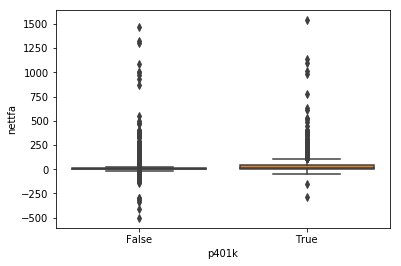

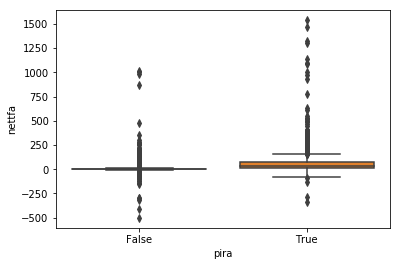

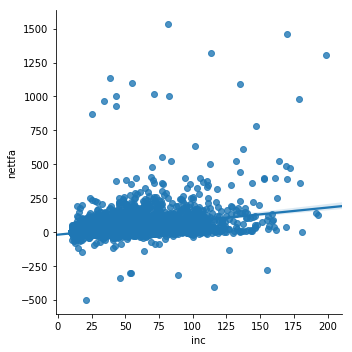

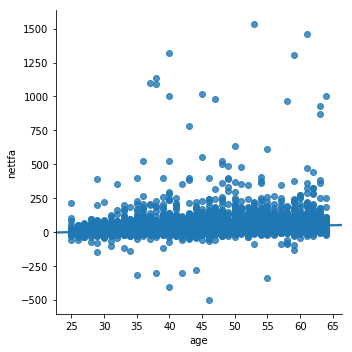

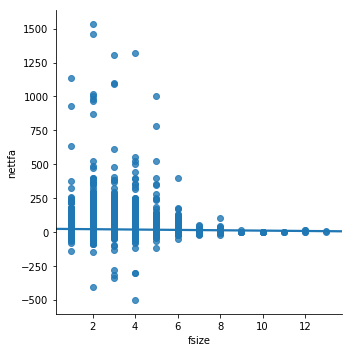

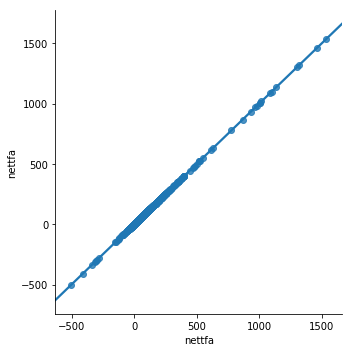

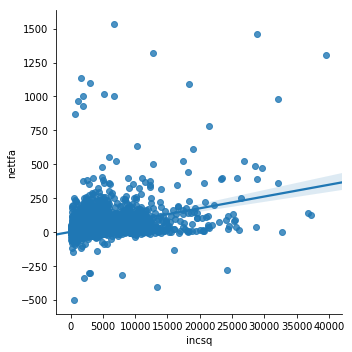

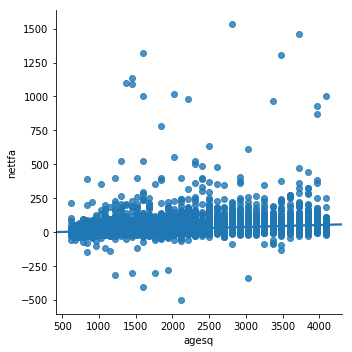

In [74]:
my_eda_clean.run()

## Initial Regression Model

## Alternative Models & Specifications

## Model Diagnostics

## Final Model